# Big-Vul dataset 

> Mining Software Repositories(MSR) Dataset

### Abstract

We collected a large C/C++ code vulnerability dataset from open-source Github projects, namely __Big-Vul__. We crawled the public Common Vulnerabilities and Exposures (CVE) database and CVE-related source code repositories. Specifically, we collected the descriptive information of the vulnerabilities from the CVE database, e.g., CVE IDs, CVE severity scores, and CVE summaries. With the CVE information and its related published Github code repository links, we downloaded all of the code repositories and extracted vulnerability related code changes. In total, Big-Vul contains 3,754 code vulnerabilities spanning 91 different vulnerability types. All these code vulnerabilities are extracted from 348 Github projects. All information is stored in the CSV format. We linked the code changes with the CVE descriptive information. Thus, our Big-Vul can be used for various research topics, e.g., detecting and fixing vulnerabilities, analyzing the vulnerability related code changes. Big-Vul is publicly available on Github. 


In page 510,

"We identified 4,432 code commits relevant to the vulnerabilities
spanning __91 CWE types__. For a given vulnerable function with the
related commits, we kept the vulnerable version of the function and
its code changes for fixing the vulnerability In total, we obtained
8,143 modified files, __11,823 vulnerable functions__, and 253,096 non-
vulnerable functions in our Big-Vul."


https://researchwith.njit.edu/en/publications/a-cc-code-vulnerability-dataset-with-code-changes-and-cve-summari
https://github.com/ZeoVan/MSR_20_Code_vulnerability_CSV_Dataset

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_chunk = pd.read_csv('MSR/MSR_data_cleaned.csv', chunksize=10000)

In [3]:
df_temp = []
for chunk in df_chunk:
    df_temp.append(chunk)

df = pd.concat(df_temp,ignore_index = True)

In [4]:
df.columns.values

array(['Unnamed: 0', 'Access Gained', 'Attack Origin',
       'Authentication Required', 'Availability', 'CVE ID', 'CVE Page',
       'CWE ID', 'Complexity', 'Confidentiality', 'Integrity',
       'Known Exploits', 'Publish Date', 'Score', 'Summary',
       'Update Date', 'Vulnerability Classification', 'add_lines',
       'codeLink', 'commit_id', 'commit_message', 'del_lines',
       'file_name', 'files_changed', 'func_after', 'func_before', 'lang',
       'lines_after', 'lines_before', 'parentID', 'patch', 'project',
       'project_after', 'project_before', 'vul', 'vul_func_with_fix'],
      dtype=object)

In [5]:
df.head(5)

,Unnamed: 0,Access Gained,Attack Origin,Authentication Required,Availability,CVE ID,CVE Page,CWE ID,Complexity,Confidentiality,...,lang,lines_after,lines_before,parentID,patch,project,project_after,project_before,vul,vul_func_with_fix
0,0,None,Remote,Single system,Partial,CVE-2015-8467,https://www.cvedetails.com/cve/CVE-2015-8467/,CWE-264,Medium,Partial,...,C,NaN,NaN,a819d2b440aafa3138d95ff6e8b824da885a70e9,"@@ -1558,12 +1558,15 @@ static int samldb_chec...",samba,https://git.samba.org/?p=samba.git;a=blob;f=so...,https://git.samba.org/?p=samba.git;a=blob;f=so...,0,static bool check_rodc_critical_attribute(stru...
1,1,None,Remote,Single system,Partial,CVE-2015-8467,https://www.cvedetails.com/cve/CVE-2015-8467/,CWE-264,Medium,Partial,...,C,NaN,NaN,a819d2b440aafa3138d95ff6e8b824da885a70e9,"@@ -1558,12 +1558,15 @@ static int samldb_chec...",samba,https://git.samba.org/?p=samba.git;a=blob;f=so...,https://git.samba.org/?p=samba.git;a=blob;f=so...,0,static int samldb_add_entry(struct samldb_ctx ...
2,2,None,Remote,Single system,Partial,CVE-2015-8467,https://www.cvedetails.com/cve/CVE-2015-8467/,CWE-264,Medium,Partial,...,C,NaN,NaN,a819d2b440aafa3138d95ff6e8b824da885a70e9,"@@ -1558,12 +1558,15 @@ static int samldb_chec...",samba,https://git.samba.org/?p=samba.git;a=blob;f=so...,https://git.samba.org/?p=samba.git;a=blob;f=so...,0,static int samldb_add_entry_callback(struct ld...
3,3,None,Remote,Single system,Partial,CVE-2015-8467,https://www.cvedetails.com/cve/CVE-2015-8467/,CWE-264,Medium,Partial,...,C,NaN,NaN,a819d2b440aafa3138d95ff6e8b824da885a70e9,"@@ -1558,12 +1558,15 @@ static int samldb_chec...",samba,https://git.samba.org/?p=samba.git;a=blob;f=so...,https://git.samba.org/?p=samba.git;a=blob;f=so...,0,static int samldb_add_handle_msDS_IntId(struct...
4,4,None,Remote,Single system,Partial,CVE-2015-8467,https://www.cvedetails.com/cve/CVE-2015-8467/,CWE-264,Medium,Partial,...,C,NaN,NaN,a819d2b440aafa3138d95ff6e8b824da885a70e9,"@@ -1558,12 +1558,15 @@ static int samldb_chec...",samba,https://git.samba.org/?p=samba.git;a=blob;f=so...,https://git.samba.org/?p=samba.git;a=blob;f=so...,0,static int samldb_add_step(struct samldb_ctx *...


In [6]:
df =df.loc[:,['CWE ID','vul','func_before','func_after','vul_func_with_fix','lang']]
df.head(10)

,CWE ID,vul,func_before,func_after,vul_func_with_fix,lang
0,CWE-264,0,static bool check_rodc_critical_attribute(stru...,static bool check_rodc_critical_attribute(stru...,static bool check_rodc_critical_attribute(stru...,C
1,CWE-264,0,static int samldb_add_entry(struct samldb_ctx ...,static int samldb_add_entry(struct samldb_ctx ...,static int samldb_add_entry(struct samldb_ctx ...,C
2,CWE-264,0,static int samldb_add_entry_callback(struct ld...,static int samldb_add_entry_callback(struct ld...,static int samldb_add_entry_callback(struct ld...,C
3,CWE-264,0,static int samldb_add_handle_msDS_IntId(struct...,static int samldb_add_handle_msDS_IntId(struct...,static int samldb_add_handle_msDS_IntId(struct...,C
4,CWE-264,0,static int samldb_add_step(struct samldb_ctx *...,static int samldb_add_step(struct samldb_ctx *...,static int samldb_add_step(struct samldb_ctx *...,C
5,CWE-264,0,static int samldb_allocate_sid(struct samldb_c...,static int samldb_allocate_sid(struct samldb_c...,static int samldb_allocate_sid(struct samldb_c...,C
6,CWE-264,0,static int samldb_check_sAMAccountName(struct ...,static int samldb_check_sAMAccountName(struct ...,static int samldb_check_sAMAccountName(struct ...,C
7,CWE-264,0,static int samldb_check_user_account_control_i...,static int samldb_check_user_account_control_i...,static int samldb_check_user_account_control_i...,C
8,CWE-264,0,static struct samldb_ctx *samldb_ctx_init(stru...,static struct samldb_ctx *samldb_ctx_init(stru...,static struct samldb_ctx *samldb_ctx_init(stru...,C
9,CWE-264,0,static int samldb_fill_foreignSecurityPrincipa...,static int samldb_fill_foreignSecurityPrincipa...,static int samldb_fill_foreignSecurityPrincipa...,C


In [7]:
df.value_counts(subset='vul')

vul
0    177736
1     10900
dtype: int64

### Vul=0 but CWE_ID is not non-vulnerable?
1. check non-vulnerable code
2. check vulnerable code
3. check the relationship between vul==0 and CWE_ID==nan
4. how many wrong data exsit?
* CWE ID == NaN & vul == 1 : vulnerable but no CWE info
* CWE ID != Nan & vul == 0 : non-vulnerable but do have CWE info

Q. Can non-vulnerable function have a Common Weakness Enumeration (CWE) ID?

A. Yes, Non-vulnerable function can have a Common Weakness Enumeration (CWE) ID.

CWE is a community-developed list of common software security weaknesses. Each CWE entry identifies a specific type of weakness that can occur in software and provides a description of the issue, as well as guidance on how to identify and mitigate it.

Not all CWEs are necessarily exploitable vulnerabilities. Some CWEs describe coding practices that can lead to errors or inefficiencies, but may not necessarily result in security vulnerabilities. In such cases, a non-vulnerable function can still exhibit the weakness described by the CWE, even though it is not a security concern.

For example, CWE-562 ("Return of Stack Variable Address") describes a coding practice where a function returns a pointer to a stack-allocated variable. This can lead to unpredictable behavior and errors in the program, but it does not necessarily create a vulnerability that can be exploited by an attacker. A function that exhibits this weakness would still have a CWE ID, even if it is not vulnerable to exploitation.

In [8]:
# 1. Test with non-vulnerable dataset
non_vul_df = df.loc[df['vul'] == 0]
non_vul_tests = non_vul_df.head(5)
non_vul_tests

,CWE ID,vul,func_before,func_after,vul_func_with_fix,lang
0,CWE-264,0,static bool check_rodc_critical_attribute(stru...,static bool check_rodc_critical_attribute(stru...,static bool check_rodc_critical_attribute(stru...,C
1,CWE-264,0,static int samldb_add_entry(struct samldb_ctx ...,static int samldb_add_entry(struct samldb_ctx ...,static int samldb_add_entry(struct samldb_ctx ...,C
2,CWE-264,0,static int samldb_add_entry_callback(struct ld...,static int samldb_add_entry_callback(struct ld...,static int samldb_add_entry_callback(struct ld...,C
3,CWE-264,0,static int samldb_add_handle_msDS_IntId(struct...,static int samldb_add_handle_msDS_IntId(struct...,static int samldb_add_handle_msDS_IntId(struct...,C
4,CWE-264,0,static int samldb_add_step(struct samldb_ctx *...,static int samldb_add_step(struct samldb_ctx *...,static int samldb_add_step(struct samldb_ctx *...,C


In [9]:
for index, non_vul_test in non_vul_tests.iterrows():
    print(f"{index}-th data----------------------")
    # func_before and func_after are the same..?
    print(non_vul_test['func_before'] == non_vul_test['func_after'])
    # func_after and vul_func_with_fix are the same..?
    print(non_vul_test['func_after'] == non_vul_test['vul_func_with_fix'])
    # func_before and vul_func_with_fix are the same..?
    print(non_vul_test['func_before'] == non_vul_test['vul_func_with_fix'])

0-th data----------------------
True
True
True
1-th data----------------------
True
True
True
2-th data----------------------
True
True
True
3-th data----------------------
True
True
True
4-th data----------------------
True
True
True


In [10]:
# 2. Test vulnerable data
vul_df = df.loc[df['vul'] == 1]
vul_tests = vul_df.head(3)
vul_tests

,CWE ID,vul,func_before,func_after,vul_func_with_fix,lang
177736,CWE-264,1,static int samldb_check_user_account_control_a...,static int samldb_check_user_account_control_a...,static int samldb_check_user_account_control_a...,C
177737,CWE-119,1,PHPAPI void php_pcre_match_impl(pcre_cache_ent...,PHPAPI void php_pcre_match_impl(pcre_cache_ent...,PHPAPI void php_pcre_match_impl(pcre_cache_ent...,C
177738,CWE-119,1,static int scan(Scanner *s)\n{\n\tuchar *curso...,static int scan(Scanner *s)\n{\n\tuchar *curso...,static int scan(Scanner *s)\n{\n\tuchar *curso...,C


In [11]:
for index, vul_test in vul_tests.iterrows():
    print(f"{index}-th data----------------------")
    print(vul_test['func_before'] == vul_test['func_after'])
    print(vul_test['func_after'] == vul_test['vul_func_with_fix'])
    print(vul_test['func_before'] == vul_test['vul_func_with_fix'])

177736-th data----------------------
False
False
False
177737-th data----------------------
False
False
False
177738-th data----------------------
False
False
False


In [12]:
# 3. check the relationship between vul==0 and CWE_ID==nan
cwe_list = df['CWE ID'].unique().tolist()
print(cwe_list)

['CWE-264', 'CWE-119', 'CWE-310', 'CWE-189', 'CWE-200', nan, 'CWE-20', 'CWE-416', 'CWE-399', 'CWE-835', 'CWE-125', 'CWE-347', 'CWE-190', 'CWE-94', 'CWE-17', 'CWE-362', 'CWE-704', 'CWE-354', 'CWE-78', 'CWE-59', 'CWE-269', 'CWE-388', 'CWE-617', 'CWE-476', 'CWE-769', 'CWE-787', 'CWE-754', 'CWE-502', 'CWE-22', 'CWE-665', 'CWE-254', 'CWE-772', 'CWE-290', 'CWE-400', 'CWE-369', 'CWE-284', 'CWE-93', 'CWE-415', 'CWE-674', 'CWE-311', 'CWE-330', 'CWE-327', 'CWE-320', 'CWE-77', 'CWE-134', 'CWE-732', 'CWE-287', 'CWE-16', 'CWE-89', 'CWE-255', 'CWE-18', 'CWE-19', 'CWE-285', 'CWE-74', 'CWE-79', 'CWE-404', 'CWE-862', 'CWE-834', 'CWE-494', 'CWE-755', 'CWE-129', 'CWE-191', 'CWE-682', 'CWE-522', 'CWE-918', 'CWE-358', 'CWE-295', 'CWE-770', 'CWE-346', 'CWE-532', 'CWE-426', 'CWE-824', 'CWE-693', 'CWE-352', 'CWE-436', 'CWE-90', 'CWE-763', 'CWE-120', 'CWE-611', 'CWE-601', 'CWE-706', 'CWE-361', 'CWE-281', 'CWE-1021', 'CWE-668', 'CWE-664', 'CWE-172', 'CWE-909', 'CWE-209', 'CWE-345', 'CWE-331', 'CWE-252']


In [13]:
# select rows with NaN values
# CWE ID NaN for both vul 0 and 1 ----->???????????????????????????
nan_df = df.loc[df.isna().any(axis=1)]
nan_df

,CWE ID,vul,func_before,func_after,vul_func_with_fix,lang
227,NaN,0,attr_count (void)\n{\n return attrhash->count...,attr_count (void)\n{\n return attrhash->count...,attr_count (void)\n{\n return attrhash->count...,C
228,NaN,0,attr_show_all (struct vty *vty)\n{\n hash_ite...,attr_show_all (struct vty *vty)\n{\n hash_ite...,attr_show_all (struct vty *vty)\n{\n hash_ite...,C
229,NaN,0,attr_show_all_iterator (struct hash_backet *ba...,attr_show_all_iterator (struct hash_backet *ba...,attr_show_all_iterator (struct hash_backet *ba...,C
230,NaN,0,attr_unknown_count (void)\n{\n return transit...,attr_unknown_count (void)\n{\n return transit...,attr_unknown_count (void)\n{\n return transit...,C
231,NaN,0,"attrhash_cmp (const void *p1, const void *p2)\...","attrhash_cmp (const void *p1, const void *p2)\...","attrhash_cmp (const void *p1, const void *p2)\...",C
...,...,...,...,...,...,...
188088,NaN,1,int vp8dx_receive_compressed_data(VP8D_COMP *p...,int vp8dx_receive_compressed_data(VP8D_COMP *p...,int vp8dx_receive_compressed_data(VP8D_COMP *p...,C
188089,NaN,1,void vp8_decoder_remove_threads(VP8D_COMP *pbi...,void vp8_decoder_remove_threads(VP8D_COMP *pbi...,void vp8_decoder_remove_threads(VP8D_COMP *pbi...,C
188090,NaN,1,void vp8mt_de_alloc_temp_buffers(VP8D_COMP *pb...,void vp8mt_de_alloc_temp_buffers(VP8D_COMP *pb...,void vp8mt_de_alloc_temp_buffers(VP8D_COMP *pb...,C
188091,NaN,1,sp<VBRISeeker> VBRISeeker::CreateFromSource(\n...,sp<VBRISeeker> VBRISeeker::CreateFromSource(\n...,sp<VBRISeeker> VBRISeeker::CreateFromSource(\n...,C


In [14]:
# 4. how many wrong data exsit?
# 4-1. CWE ID == NaN & vul == 1 : vulnerable but no CWE info

# Maybe put it to the root class-->?

no_cwe_vul = df[(df['CWE ID'].isna()) & (df['vul'] == 1)]
print(no_cwe_vul.count())
no_cwe_vul.head(3)

CWE ID                  0
vul                  2117
func_before          2117
func_after           2117
vul_func_with_fix    2117
lang                 2117
dtype: int64


,CWE ID,vul,func_before,func_after,vul_func_with_fix,lang
177745,NaN,1,"int phar_get_entry_data(phar_entry_data **ret,...","int phar_get_entry_data(phar_entry_data **ret,...","int phar_get_entry_data(phar_entry_data **ret,...",C
177747,NaN,1,bgp_attr_unknown (struct bgp_attr_parser_args...,bgp_attr_unknown (struct bgp_attr_parser_args...,bgp_attr_unknown (struct bgp_attr_parser_args...,C
177769,NaN,1,"int recv_files(int f_in, int f_out, char *loca...","int recv_files(int f_in, int f_out, char *loca...","int recv_files(int f_in, int f_out, char *loca...",C


### Drop no CWE & vulnerable

In [15]:
# drop rows where the code is vulnerable but not having CWE id information
df = df.drop(no_cwe_vul.index)

# check
df[(df['CWE ID'].isna()) & (df['vul'] == 1)].count()

CWE ID               0
vul                  0
func_before          0
func_after           0
vul_func_with_fix    0
lang                 0
dtype: int64

In [16]:
# 4.2 CWE ID != Nan & vul == 0 : non-vulnerable but do have CWE info
# make new label column - vul-> no cweid but don't touch the original CWE ID column 

cwe_with_non_vul = df[(df['CWE ID'].notnull()) & (df['vul'] == 0)]
print(cwe_with_non_vul.count())
cwe_with_non_vul.head(3)

CWE ID               143648
vul                  143648
func_before          143648
func_after           143648
vul_func_with_fix    143648
lang                 143648
dtype: int64


,CWE ID,vul,func_before,func_after,vul_func_with_fix,lang
0,CWE-264,0,static bool check_rodc_critical_attribute(stru...,static bool check_rodc_critical_attribute(stru...,static bool check_rodc_critical_attribute(stru...,C
1,CWE-264,0,static int samldb_add_entry(struct samldb_ctx ...,static int samldb_add_entry(struct samldb_ctx ...,static int samldb_add_entry(struct samldb_ctx ...,C
2,CWE-264,0,static int samldb_add_entry_callback(struct ld...,static int samldb_add_entry_callback(struct ld...,static int samldb_add_entry_callback(struct ld...,C


### Add a new cwe id column for labeling exceptional cases

In [17]:
index_list = list(cwe_with_non_vul.index)

df['cwe_id_new'] = df['CWE ID']
# iterate over the index_list and add "-non-vul" to the current value of "cwe_id_new"
for i in index_list:
    df.loc[i, 'cwe_id_new'] = str(df.loc[i, 'cwe_id_new'])+ "-non-vul"

In [18]:
# 3. check the relationship between vul==0 and CWE_ID==nan
cwe_new_list = df['cwe_id_new'].unique().tolist()
print(cwe_new_list)

['CWE-264-non-vul', 'CWE-119-non-vul', 'CWE-310-non-vul', 'CWE-189-non-vul', 'CWE-200-non-vul', nan, 'CWE-20-non-vul', 'CWE-416-non-vul', 'CWE-399-non-vul', 'CWE-835-non-vul', 'CWE-125-non-vul', 'CWE-347-non-vul', 'CWE-190-non-vul', 'CWE-94-non-vul', 'CWE-17-non-vul', 'CWE-362-non-vul', 'CWE-704-non-vul', 'CWE-354-non-vul', 'CWE-78-non-vul', 'CWE-59-non-vul', 'CWE-269-non-vul', 'CWE-388-non-vul', 'CWE-617-non-vul', 'CWE-476-non-vul', 'CWE-769-non-vul', 'CWE-787-non-vul', 'CWE-754-non-vul', 'CWE-502-non-vul', 'CWE-22-non-vul', 'CWE-665-non-vul', 'CWE-254-non-vul', 'CWE-772-non-vul', 'CWE-290-non-vul', 'CWE-400-non-vul', 'CWE-369-non-vul', 'CWE-284-non-vul', 'CWE-93-non-vul', 'CWE-415-non-vul', 'CWE-674-non-vul', 'CWE-311-non-vul', 'CWE-330-non-vul', 'CWE-327-non-vul', 'CWE-320-non-vul', 'CWE-77-non-vul', 'CWE-134-non-vul', 'CWE-732-non-vul', 'CWE-287-non-vul', 'CWE-16-non-vul', 'CWE-89-non-vul', 'CWE-255-non-vul', 'CWE-18-non-vul', 'CWE-19-non-vul', 'CWE-285-non-vul', 'CWE-74-non-vul', 

In [19]:
print(f"Original # of cwe id: {len(cwe_list)},\n # of New cwe id: {len(cwe_new_list)}, \n # of created cwe ids: {len(cwe_new_list)-len(cwe_list)}")

Original # of cwe id: 92,
 # of New cwe id: 176, 
 # of created cwe ids: 84


In [20]:
no_cwe_with_non_vul = df[(df['CWE ID'].isna()) & (df['vul'] == 0)]
print(no_cwe_with_non_vul.count())
no_cwe_with_non_vul.head(3)

CWE ID                   0
vul                  34088
func_before          34088
func_after           34088
vul_func_with_fix    34088
lang                 34088
cwe_id_new               0
dtype: int64


,CWE ID,vul,func_before,func_after,vul_func_with_fix,lang,cwe_id_new
227,NaN,0,attr_count (void)\n{\n return attrhash->count...,attr_count (void)\n{\n return attrhash->count...,attr_count (void)\n{\n return attrhash->count...,C,NaN
228,NaN,0,attr_show_all (struct vty *vty)\n{\n hash_ite...,attr_show_all (struct vty *vty)\n{\n hash_ite...,attr_show_all (struct vty *vty)\n{\n hash_ite...,C,NaN
229,NaN,0,attr_show_all_iterator (struct hash_backet *ba...,attr_show_all_iterator (struct hash_backet *ba...,attr_show_all_iterator (struct hash_backet *ba...,C,NaN


In [21]:
# iterate over the index_list and add "-non-vul" to the current value of "CWE ID"
non_vul_index_list = list(no_cwe_with_non_vul.index)
for i in non_vul_index_list:
    df.loc[i, 'CWE ID'] = "non-vulnerable"
    df.loc[i, 'cwe_id_new'] = "non-vulnerable"

### Count in Vulnerability classes 

In [22]:
df.value_counts(subset='vul')

vul
0    177736
1      8783
dtype: int64

### Count in CWE ID classes

CWE ID
non-vulnerable    34088
CWE-119           26497
CWE-20            20501
CWE-399           14806
CWE-264           12487
                  ...  
CWE-769               3
CWE-345               2
CWE-331               1
CWE-209               1
CWE-252               1
Length: 92, dtype: int64


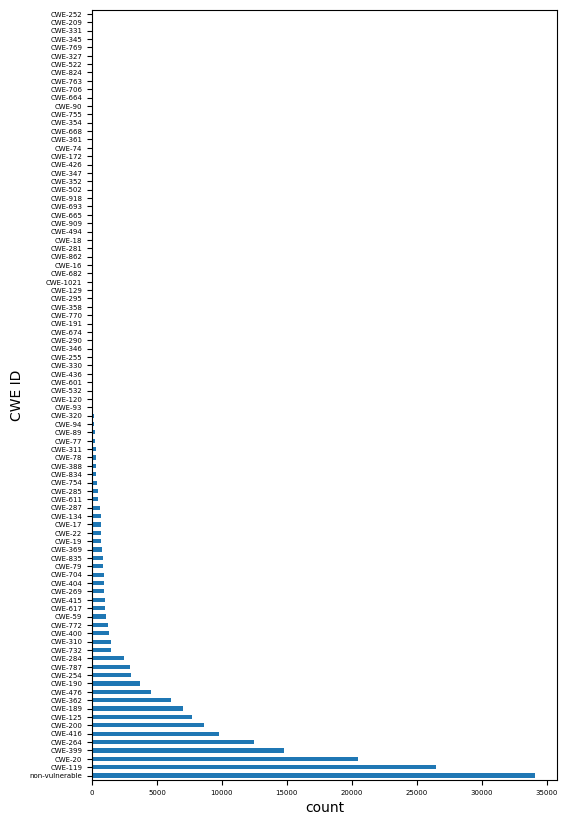

In [33]:
print(df.value_counts(subset='CWE ID'))
plt.figure(figsize=(6, 10))
df.value_counts(subset='CWE ID').plot.barh(xlabel='count', ylabel='CWE ID',fontsize=5)
plt.show()

cwe_id_new
non-vulnerable     34088
CWE-119-non-vul    24370
CWE-20-non-vul     19359
CWE-399-non-vul    14070
CWE-264-non-vul    11979
                   ...  
CWE-252                1
CWE-331                1
CWE-664                1
CWE-668                1
CWE-1021               1
Length: 176, dtype: int64


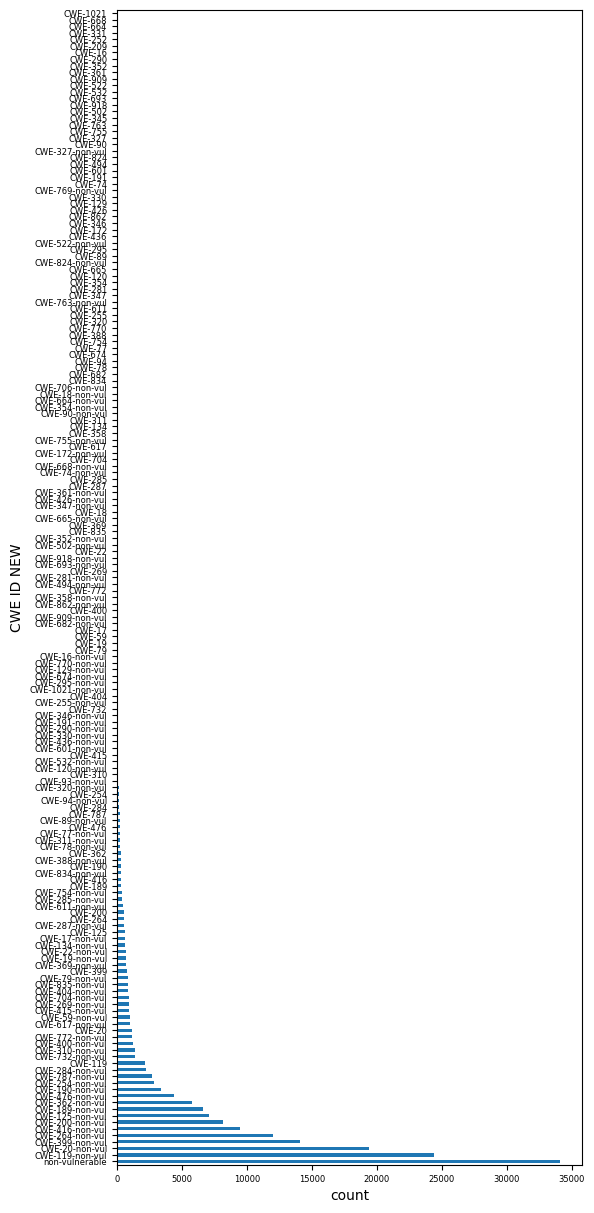

In [32]:
print(df.value_counts(subset='cwe_id_new'))

# plot the dataframe with increased height
plt.figure(figsize=(6, 15))
df.value_counts(subset='cwe_id_new').plot.barh(xlabel='count', ylabel='CWE ID NEW',fontsize=6)
plt.show()

### Remove Reduntancy in programming language

In [25]:
df.value_counts(subset='lang')

lang
C      183890
CPP      2626
C++         3
dtype: int64

In [26]:
df.loc[df['lang']=='CPP', 'lang'] = 'C++'

In [27]:
df.value_counts(subset='lang')

lang
C      183890
C++      2629
dtype: int64

In [28]:
# Save it to csv file
df.to_csv("preprocessed datasets/MSR_new.csv")